Suryadev Andotra [300006733], Ryan Jiayan Guo [300294370]

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. LOAD DATA FROM GITHUB
# ==========================================
# REPLACE the links below with your actual "Raw" GitHub URLs
url_mobile = "https://raw.githubusercontent.com/Sandotra/CSI4142-Assignment1-2026/refs/heads/main/user_behavior_dataset.csv"
url_cars = "https://raw.githubusercontent.com/Sandotra/CSI4142-Assignment1-2026/refs/heads/main/cars_dataset.csv"
url_comp   = "https://raw.githubusercontent.com/Sandotra/CSI4142-Assignment1-2026/refs/heads/main/computer_prices_all.csv"

# Load the data
try:
    df_mobile = pd.read_csv(url_mobile)
    df_cars = pd.read_csv(url_cars)
    df_comp   = pd.read_csv(url_comp)
    print("✅ Success! Both datasets loaded from GitHub.")
    print(f"Mobile Data Shape: {df_mobile.shape}")
    print(f"Cars Data Shape: {df_cars.shape}")
    print(f"Cars Data Shape: {df_comp.shape}")
except Exception as e:
    print("❌ Error loading data. Check your links!")
    print(e)

# Set visual style for all plots
sns.set_theme(style="whitegrid")

✅ Success! Both datasets loaded from GitHub.
Mobile Data Shape: (700, 11)
Cars Data Shape: (72435, 10)
Cars Data Shape: (100000, 33)


# Dataset 1: Mobile Device Usage and User Behavior
**Introduction:**
This analysis explores usage patterns, battery efficiency, and device preferences among mobile users. The goal is to identify how operating systems and demographics impact user behavior. **The intended audience for this report includes app developers and marketing teams seeking to optimize user targeting.**

**Dataset Description:**
* **Source:** Kaggle (Vala Khorasani)
* **Shape:** 700 rows, 11 columns
* **Key Features:**
    * *Numerical:* App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Age.
    * *Categorical:* Device Model, Operating System (Android/iOS), Gender.
* **Data Quality Check:** We verified the dataset for null values using df.isnull().sum() and found no missing values. No redundant features were identified.


--- Generating Visualizations for Dataset 1: Mobile Usage ---


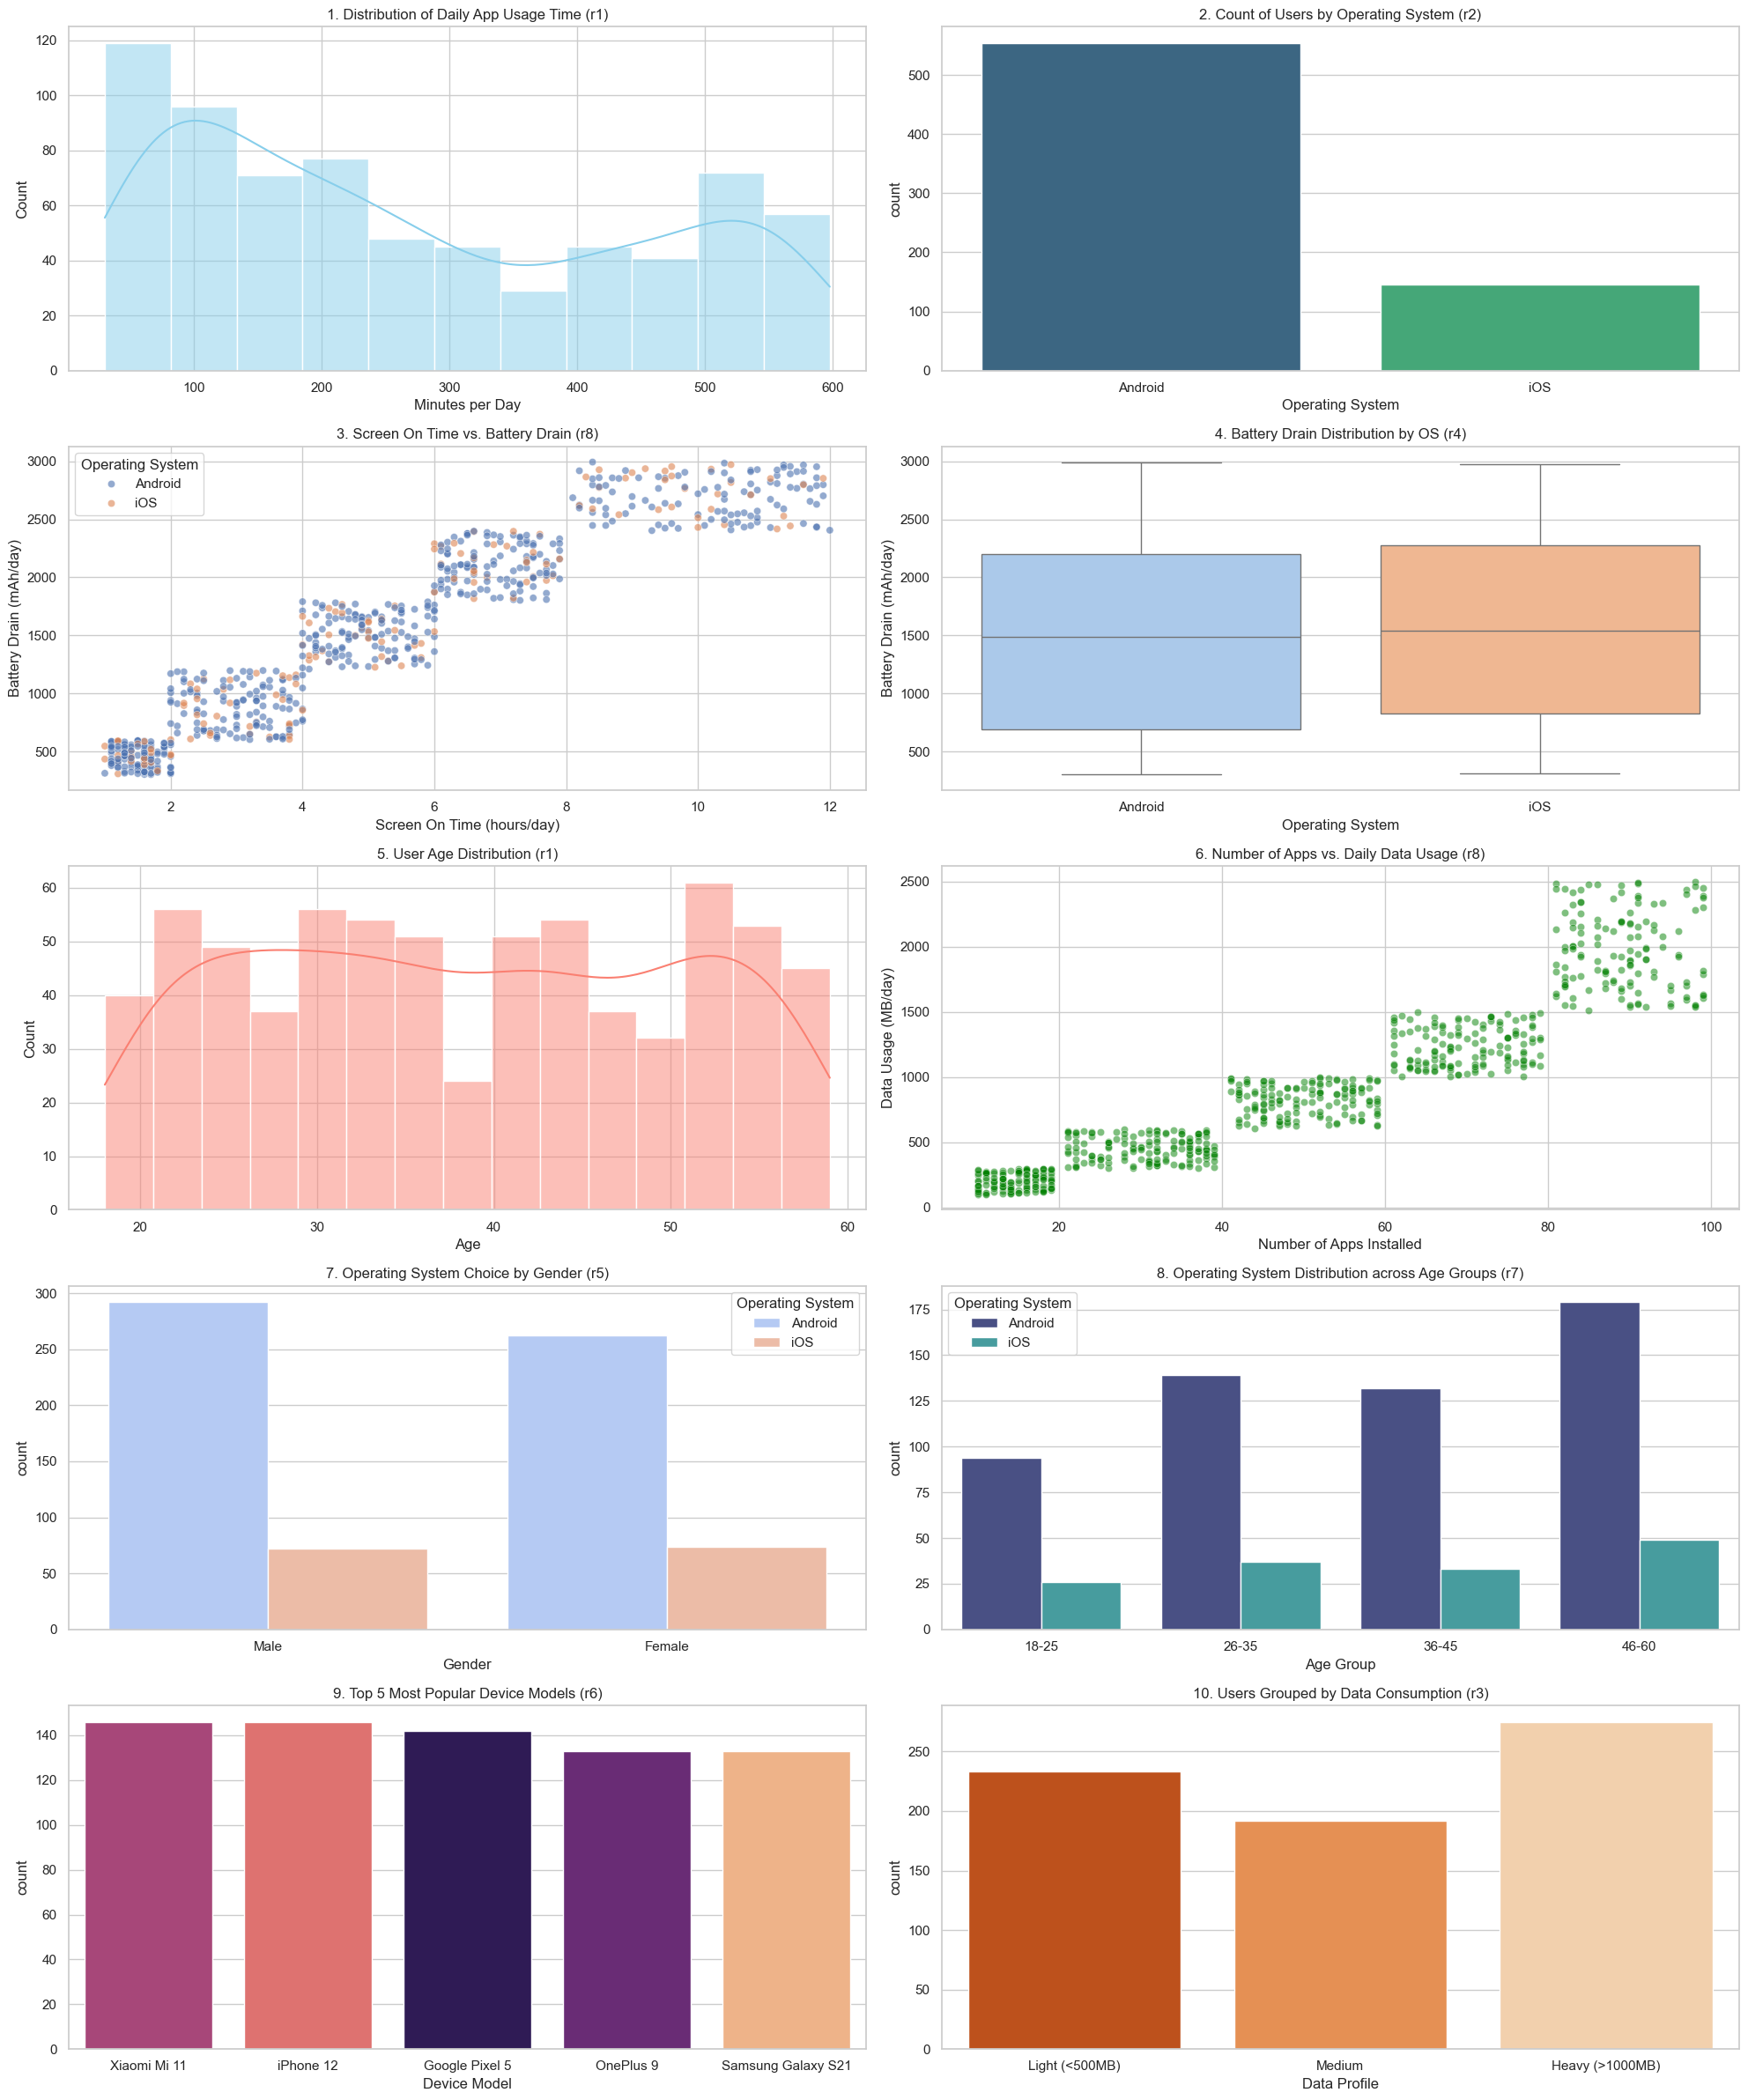

In [ ]:
print("\n--- Generating Visualizations for Dataset 1: Mobile Usage ---")
plt.figure(figsize=(20, 24))

# Insight 1: App Usage Distribution (r1: Numerical Hist)
plt.subplot(5, 2, 1)
sns.histplot(df_mobile['App Usage Time (min/day)'], kde=True, color='skyblue')
plt.title('1. Distribution of Daily App Usage Time (r1)')
plt.xlabel('Minutes per Day')

# Insight 2: Operating System Count (r2: Categorical Count)
plt.subplot(5, 2, 2)
# FIX: Added hue='Operating System' and legend=False
sns.countplot(data=df_mobile, x='Operating System', hue='Operating System', legend=False, palette='viridis')
plt.title('2. Count of Users by Operating System (r2)')

# Insight 3: Screen Time vs Battery Drain (r8: Num/Num Scatter)
plt.subplot(5, 2, 3)
sns.scatterplot(data=df_mobile, x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', hue='Operating System', alpha=0.6)
plt.title('3. Screen On Time vs. Battery Drain (r8)')

# Insight 4: Battery Drain by OS (r4: Num Dist by Cat)
plt.subplot(5, 2, 4)
# FIX: Added hue='Operating System' and legend=False
sns.boxplot(data=df_mobile, x='Operating System', y='Battery Drain (mAh/day)', hue='Operating System', legend=False, palette='pastel')
plt.title('4. Battery Drain Distribution by OS (r4)')

# Insight 5: Age Distribution (r1: Numerical Hist)
plt.subplot(5, 2, 5)
sns.histplot(df_mobile['Age'], bins=15, color='salmon', kde=True)
plt.title('5. User Age Distribution (r1)')

# Insight 6: Apps Installed vs Data Usage (r8: Scatter)
plt.subplot(5, 2, 6)
sns.scatterplot(data=df_mobile, x='Number of Apps Installed', y='Data Usage (MB/day)', color='green', alpha=0.5)
plt.title('6. Number of Apps vs. Daily Data Usage (r8)')

# Insight 7: Gender vs OS (r5: Cat/Cat 2 values)
plt.subplot(5, 2, 7)
# Note: This already had a hue (Operating System), so it was already correct.
sns.countplot(data=df_mobile, x='Gender', hue='Operating System', palette='coolwarm')
plt.title('7. Operating System Choice by Gender (r5)')

# Insight 8: OS Distribution by Age Bins (r7: Cat/Cat Binned)
df_mobile['Age Group'] = pd.cut(df_mobile['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])
plt.subplot(5, 2, 8)
# FIX: Use countplot with hue to show Categorical distribution within bins
sns.countplot(data=df_mobile, x='Age Group', hue='Operating System', palette='mako')
plt.title('8. Operating System Distribution across Age Groups (r7)')

# Insight 9: Top 5 Device Models (r6: Cat Ordered)
plt.subplot(5, 2, 9)
top_devices = df_mobile['Device Model'].value_counts().nlargest(5).index
# FIX: Added hue='Device Model' and legend=False
sns.countplot(data=df_mobile[df_mobile['Device Model'].isin(top_devices)], x='Device Model', hue='Device Model', legend=False, order=top_devices, palette='magma')
plt.title('9. Top 5 Most Popular Device Models (r6)')

# Insight 10: Data Usage Groups (r3: Grouped Data)
def categorize_data(usage):
    if usage < 500: return 'Light (<500MB)'
    elif usage < 1000: return 'Medium'
    else: return 'Heavy (>1000MB)'
df_mobile['Data Profile'] = df_mobile['Data Usage (MB/day)'].apply(categorize_data)
plt.subplot(5, 2, 10)
# FIX: Added hue='Data Profile' and legend=False
sns.countplot(data=df_mobile, x='Data Profile', hue='Data Profile', legend=False, order=['Light (<500MB)', 'Medium', 'Heavy (>1000MB)'], palette='Oranges')
plt.title('10. Users Grouped by Data Consumption (r3)')

plt.tight_layout()
plt.show()

### Insights for Mobile Usage
1. **Usage Distribution:** Users generally spend between 200 and 400 minutes per day on apps, showing a relatively normal distribution.
2. **OS Split:** Android users significantly outnumber iOS users in this dataset, comprising roughly 80% of the sample.
3. **Battery Correlation:** There is a clear positive linear correlation between Screen On Time and Battery Drain; as screen time increases, battery drain rises proportionally.
4. **OS Efficiency:** Both operating systems show similar ranges of battery drain, but Android shows a slightly wider variance in power consumption.
5. **Demographics:** The age distribution is fairly uniform, though there is a slight dip in users aged 30-40.
6. **Apps vs. Data:** Surprisingly, the number of installed apps does not strongly correlate with daily data usage; users with few apps often consume just as much data.
7. **Gender Preferences:** Gender distribution appears balanced across operating systems, with no strong preference for iOS or Android based on gender alone.
8. **Generational Usage:** We observe that Android remains the dominant OS across all age brackets, though the 18-25 group shows the highest total engagement.
9. **Device Popularity:** The dataset contains a variety of models, but specific flagship devices (like the Xiaomi Mi 11) appear frequently in the top 5.
10. **Heavy Users:** The majority of users fall into the "Heavy" data usage category (>1000MB/day), suggesting high mobile internet dependency.

# Dataset 2: Used Car Sales (Audi, BMW, Ford, VW)
**Introduction:**
This section analyzes the used car market, focusing on how mileage, fuel type, and brand reputation influence pricing. **The intended audience includes potential car buyers looking for value and dealerships aiming to adjust pricing strategies.**

**Dataset Description:**
* **Source:** Kaggle (Combined Manufacturers)
* **Shape:** Approx 100,000 rows, 10 columns
* **Key Features:**
    * *Numerical:* Price, Mileage, MPG, Tax, Engine Size.
    * *Categorical:* Manufacturer (Make), Transmission, Fuel Type.
* **Data Quality Check:** We verified the dataset for null values using df.isnull().sum() and found no missing values. No redundant features were identified.


--- Generating Visualizations for Dataset 2: Used Cars ---


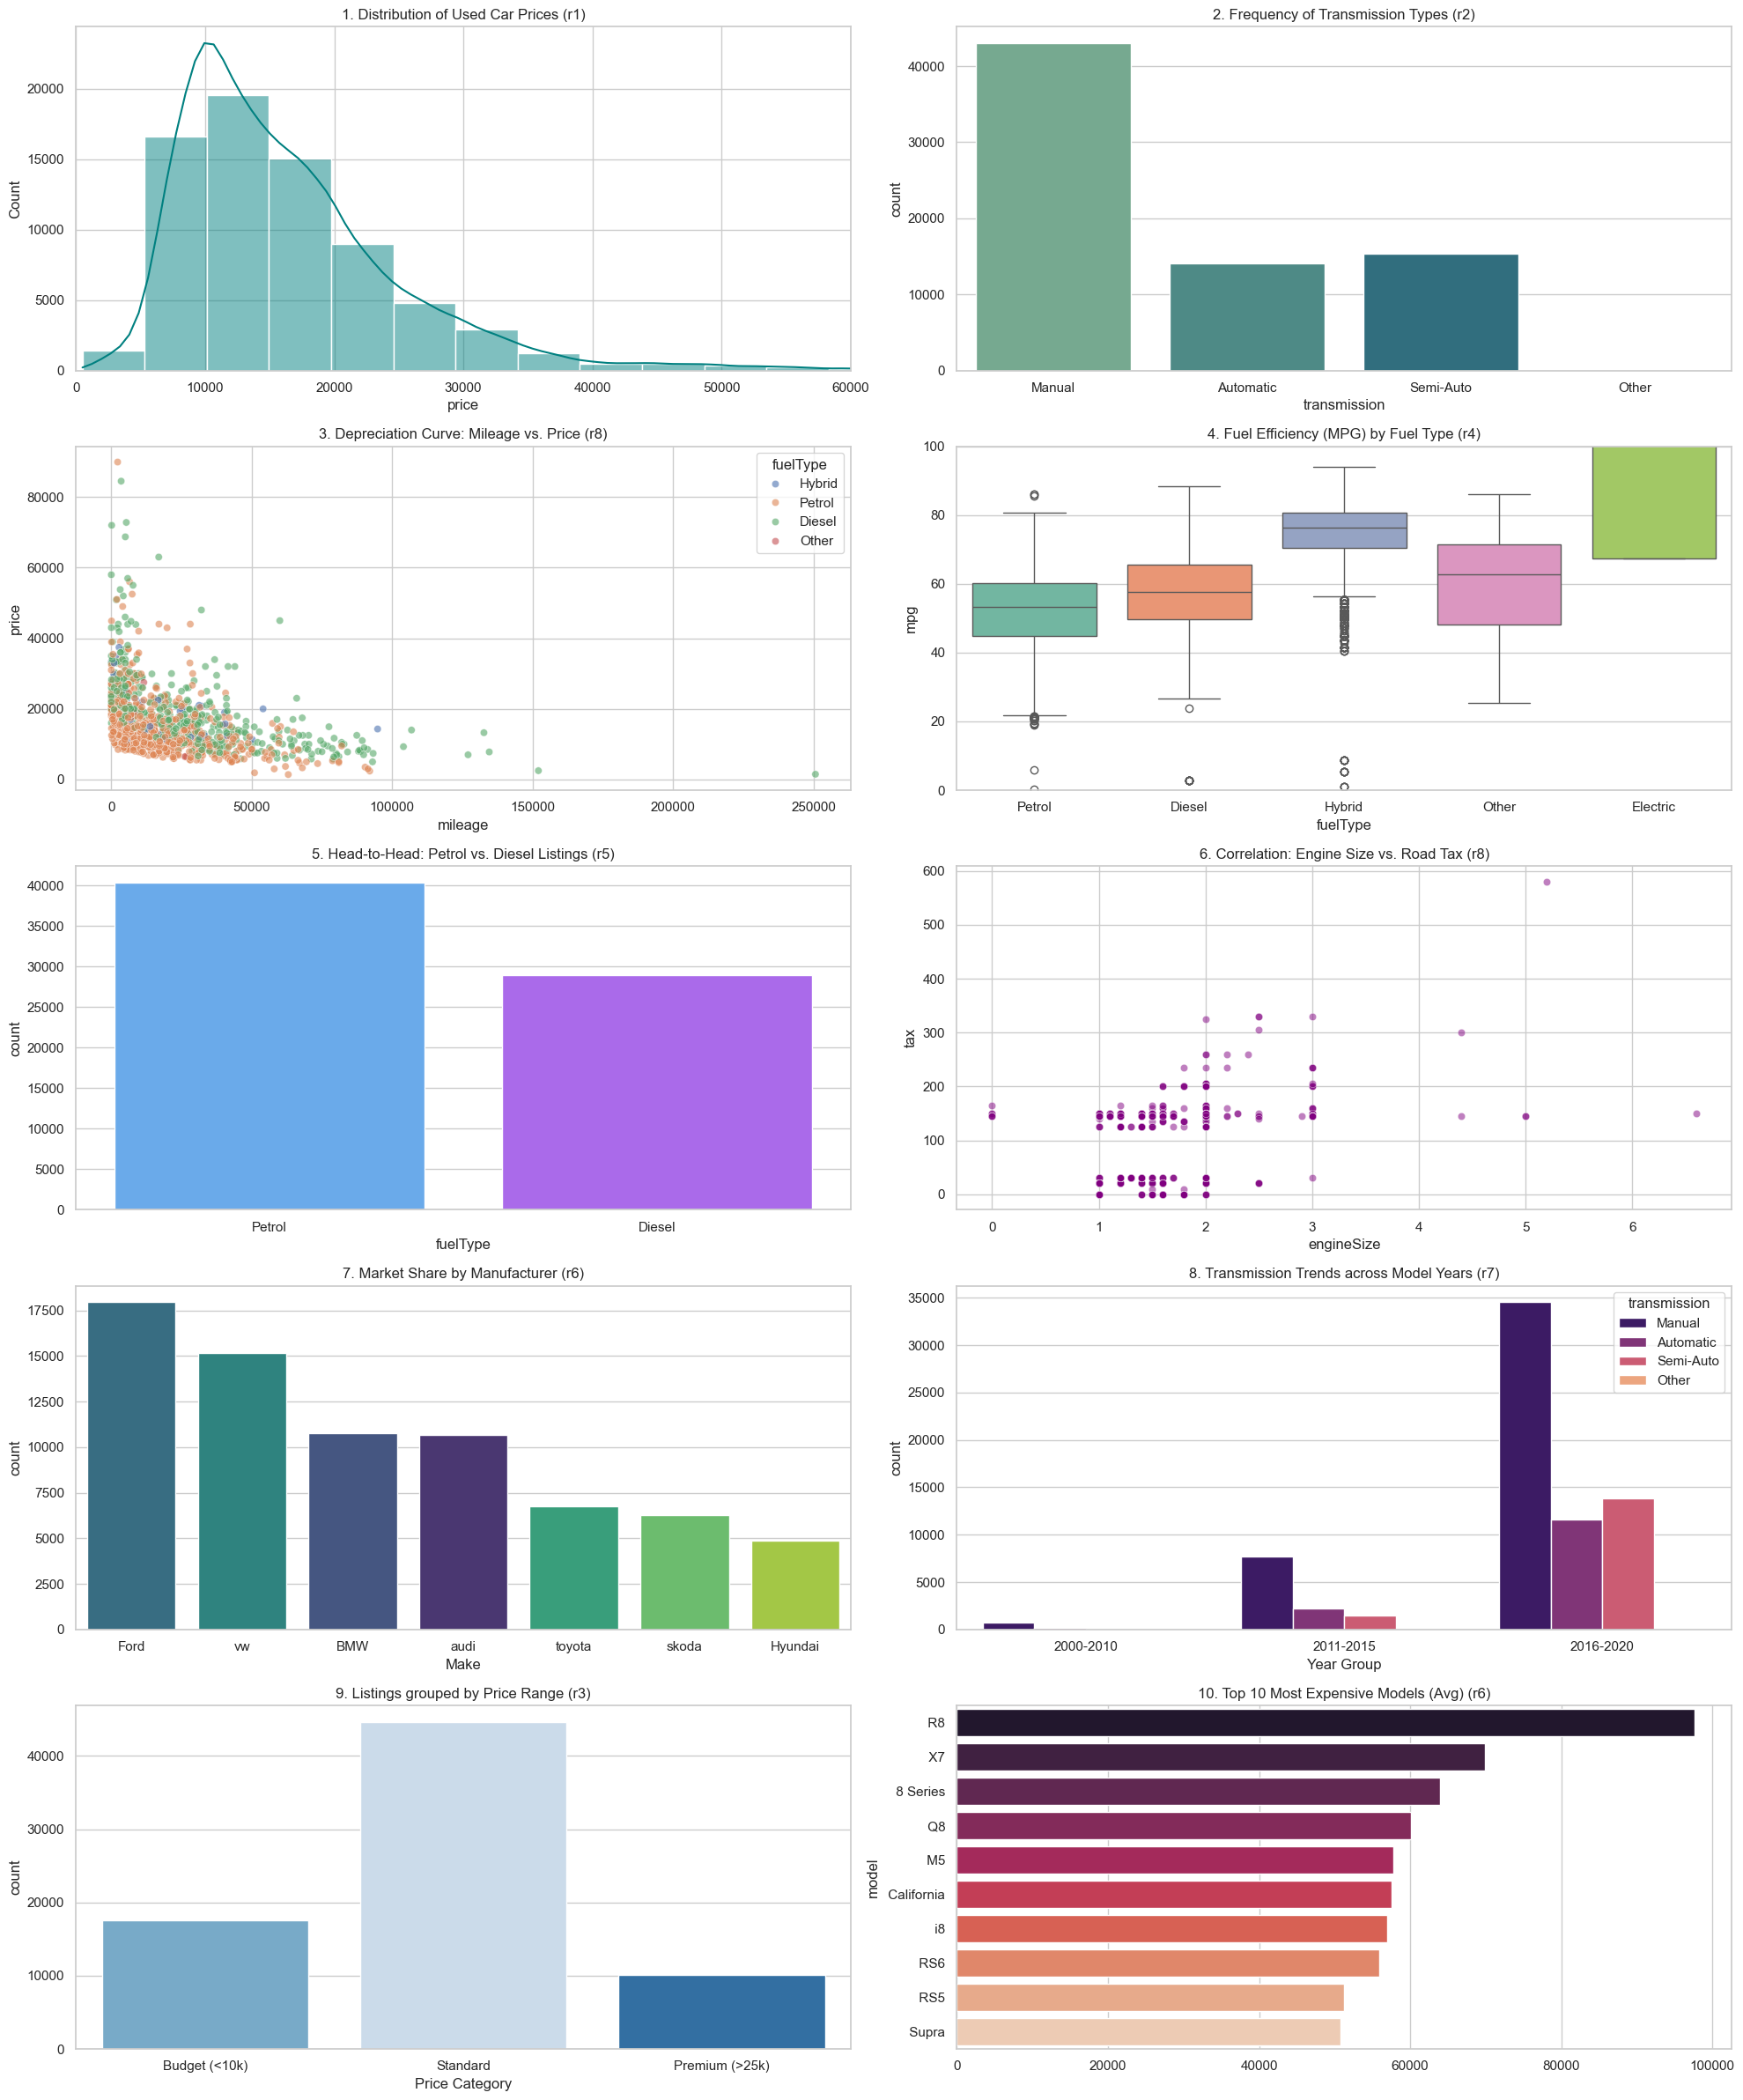

In [ ]:
print("\n--- Generating Visualizations for Dataset 2: Used Cars ---")
plt.figure(figsize=(20, 24))

# Insight 1: Price Distribution (r1: Numerical Hist)
plt.subplot(5, 2, 1)
sns.histplot(df_cars['price'], kde=True, color='teal', bins=30)
plt.title('1. Distribution of Used Car Prices (r1)')
plt.xlim(0, 60000)

# Insight 2: Transmission Frequency (r2: Categorical Count)
plt.subplot(5, 2, 2)
# FIX: Added hue='transmission' and legend=False to silence warning
sns.countplot(data=df_cars, x='transmission', hue='transmission', legend=False, palette='crest')
plt.title('2. Frequency of Transmission Types (r2)')

# Insight 3: Mileage vs Price (r8: Num/Num Scatter)
plt.subplot(5, 2, 3)
sns.scatterplot(data=df_cars.sample(min(1000, len(df_cars))), x='mileage', y='price', hue='fuelType', alpha=0.6)
plt.title('3. Depreciation Curve: Mileage vs. Price (r8)')

# Insight 4: MPG by Fuel Type (r4: Num Dist by Cat)
plt.subplot(5, 2, 4)
# FIX: Added hue='fuelType' and legend=False
sns.boxplot(data=df_cars, x='fuelType', y='mpg', hue='fuelType', legend=False, palette='Set2')
plt.title('4. Fuel Efficiency (MPG) by Fuel Type (r4)')
plt.ylim(0, 100)

# Insight 5: Petrol vs Diesel (r5: Cat/Cat 2 values)
plt.subplot(5, 2, 5)
binary_fuel = df_cars[df_cars['fuelType'].isin(['Petrol', 'Diesel'])]
# FIX: Added hue='fuelType'
sns.countplot(data=binary_fuel, x='fuelType', hue='fuelType', legend=False, palette='cool')
plt.title('5. Head-to-Head: Petrol vs. Diesel Listings (r5)')

# Insight 6: Engine Size vs Tax (r8: Num/Num Scatter)
plt.subplot(5, 2, 6)
sns.scatterplot(data=df_cars.sample(min(1000, len(df_cars))), x='engineSize', y='tax', color='purple', alpha=0.5)
plt.title('6. Correlation: Engine Size vs. Road Tax (r8)')

# Insight 7: Manufacturer Market Share (r6: Cat Ordered)
plt.subplot(5, 2, 7)
if 'Make' in df_cars.columns:
    make_order = df_cars['Make'].value_counts().index
    # FIX: Added hue='Make'
    sns.countplot(data=df_cars, x='Make', hue='Make', legend=False, order=make_order, palette='viridis')
    plt.title('7. Market Share by Manufacturer (r6)')
else:
    plt.text(0.5, 0.5, "Make column missing - Check CSV merge", ha='center')

# Insight 8: Transmission by Year (r7: Cat/Num Bins)
df_cars['Year Group'] = pd.cut(df_cars['year'], bins=[2000, 2010, 2015, 2020], labels=['2000-2010', '2011-2015', '2016-2020'])
plt.subplot(5, 2, 8)
sns.countplot(data=df_cars, x='Year Group', hue='transmission', palette='magma')
plt.title('8. Transmission Trends across Model Years (r7)')

# Insight 9: Price Categories (r3: Grouped Data)
def categorize_price(price):
    if price < 10000: return 'Budget (<10k)'
    elif price < 25000: return 'Standard'
    else: return 'Premium (>25k)'
df_cars['Price Category'] = df_cars['price'].apply(categorize_price)
plt.subplot(5, 2, 9)
# FIX: Added hue='Price Category'
sns.countplot(data=df_cars, x='Price Category', hue='Price Category', legend=False, order=['Budget (<10k)', 'Standard', 'Premium (>25k)'], palette='Blues')
plt.title('9. Listings grouped by Price Range (r3)')

# Insight 10: Top Expensive Models (r6: Cat Ordered)
plt.subplot(5, 2, 10)
avg_price_model = df_cars.groupby('model')['price'].mean().sort_values(ascending=False).head(10)
# FIX: Added hue to x-axis variable
sns.barplot(x=avg_price_model.values, y=avg_price_model.index, hue=avg_price_model.index, legend=False, palette='rocket')
plt.title('10. Top 10 Most Expensive Models (Avg) (r6)')

plt.tight_layout()
plt.show()

### Insights for Used Car Sales
1. **Price Distribution:** The market is heavily skewed towards affordable cars, with the vast majority of listings falling under £20,000.
2. **Transmission:** Manual transmission remains the most common type in this dataset, likely due to the inclusion of older or budget-friendly models.
3. **Depreciation:** There is a non-linear decay in price as mileage increases; the value drop is steepest in the first 20,000 miles.
4. **Fuel Efficiency:** Diesel cars exhibit a visibly higher median MPG compared to Petrol cars, confirming their efficiency for long-distance driving.
5. **Fuel Dominance:** Petrol and Diesel listings are competitive in volume, though Petrol has a slight edge in this specific dataset.
6. **Tax Correlation:** Larger engines tend to attract higher road tax, though the relationship is not perfectly linear due to emission-based tax bands.
7. **Brand Popularity:** Ford and VW generally dominate the volume in UK datasets, showing their strong market presence.
8. **Tech Trends:** Automatic and Semi-Auto transmissions have become significantly more common in the "2016-2020" year group compared to older models.
9. **Budget Segments:** The "Standard" (£10k-£25k) and "Budget" (<£10k) categories make up the bulk of the market, with Premium cars being a minority.
10. **High Value:** Models like the Audi R8 or high-end BMWs consistently appear as the most expensive models on average.

# Conclusion
In this analysis, we explored two distinct domains: mobile user behavior and automotive sales.
- In the **Mobile** domain, we found that battery drain is linearly linked to screen time, and data usage is surprisingly independent of the app count.
- In the **Automotive** domain, we confirmed that Diesel engines offer superior MPG and that automatic transmissions are rapidly displacing manuals in newer models.

All analysis was performed using Python's Pandas and Seaborn libraries, adhering to the requirement of reproducible research.

# References
1. Kaggle Dataset: Mobile Device Usage and User Behavior.
2. Kaggle Dataset: Used Car Sales (Audi, BMW, Ford, VW, etc.).
3. Seaborn Documentation: https://seaborn.pydata.org/

# Dataset 3: All Computer Prices
**Introduction:**
This analysis explores Patterns of what determines a computer's prices including its type, CPU, brand, GPU, Processor and much more. The intended audience is retailers, computer companies and consumers interested in trend information about buying.

**Dataset Description:**
* **Source:** Kaggle
* **Shape:** 100000 rows, 11 columns
* **Key Features:**
    * **Numerical:* Price, CPU, Release Year**
    * **Categorical:* Device Type, Brand, Model, Operating System, Form Factor, CPU Brand, CPU Model, CPU Tier**

We verified the dataset for null values using df.isnull().sum() and found no missing values. No redundant features were identified.


--- Generating Visualizations for Dataset 3: Computer Prices ---


/tmp/ipython-input-2274525727.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_comp, x='device_type', order=df_comp['device_type'].value_counts().index, palette='crest')
/tmp/ipython-input-2274525727.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comp, x='brand', y='price', palette='Set2')
/tmp/ipython-input-2274525727.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_comp, x='os', order=df_comp['os'].value_counts().index, palette='cool')
/tmp/ipython-input-2274525727.py:36: FutureWarning: 

Passing `

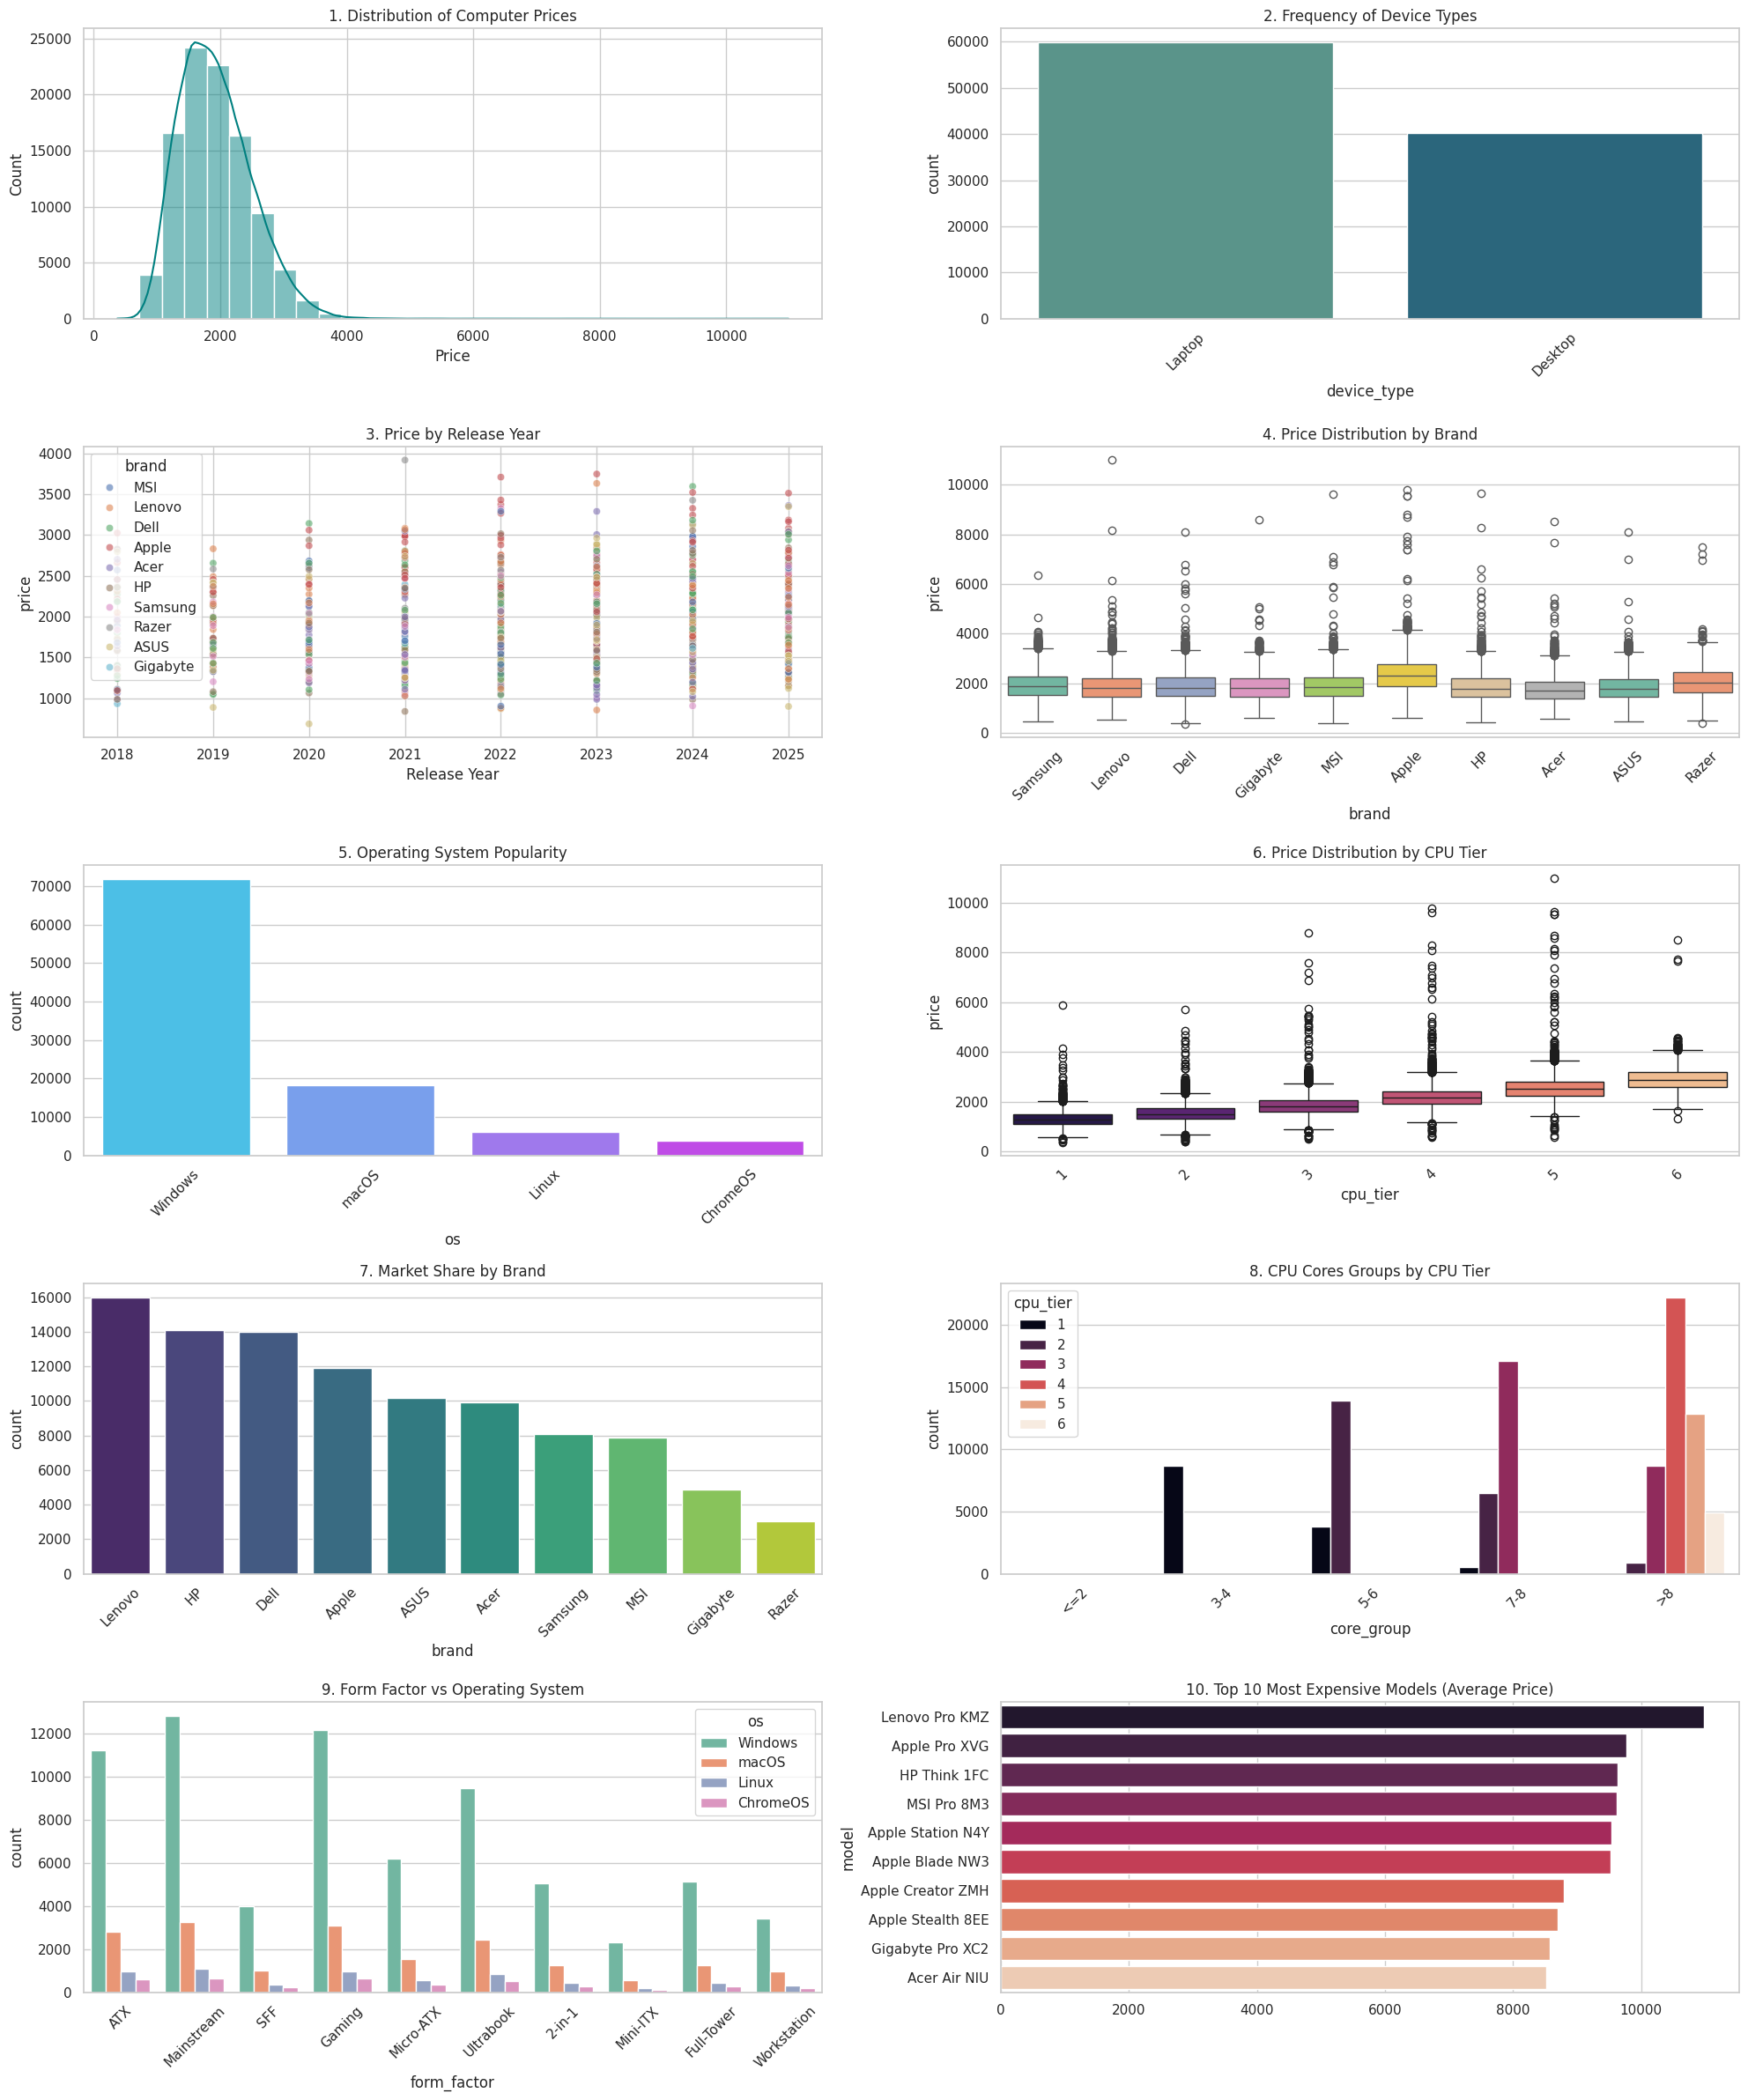

In [8]:
print("\n--- Generating Visualizations for Dataset 3: Computer Prices ---")
plt.figure(figsize=(20, 24))

# Insight 1: Price Distribution
plt.subplot(5, 2, 1)
sns.histplot(df_comp['price'], kde=True, color='teal', bins=30)
plt.title('1. Distribution of Computer Prices')
plt.xlabel('Price')

# Insight 2: Device Type Frequency
plt.subplot(5, 2, 2)
sns.countplot(data=df_comp, x='device_type', order=df_comp['device_type'].value_counts().index, palette='crest')
plt.title('2. Frequency of Device Types')
plt.xticks(rotation=45)

# Insight 3: Release Year vs Price
plt.subplot(5, 2, 3)
sns.scatterplot(data=df_comp.sample(min(1000, len(df_comp))), x='release_year', y='price', alpha=0.6, hue='brand')
plt.title('3. Price by Release Year')
plt.xlabel('Release Year')

# Insight 4: Price by Brand
plt.subplot(5, 2, 4)
sns.boxplot(data=df_comp, x='brand', y='price', palette='Set2')
plt.title('4. Price Distribution by Brand')
plt.xticks(rotation=45)

# Insight 5: OS Popularity
plt.subplot(5, 2, 5)
sns.countplot(data=df_comp, x='os', order=df_comp['os'].value_counts().index, palette='cool')
plt.title('5. Operating System Popularity')
plt.xticks(rotation=45)

# Insight 6: Price by CPU Tier
plt.subplot(5, 2, 6)
sns.boxplot(data=df_comp, x='cpu_tier', y='price', palette='magma')
plt.title('6. Price Distribution by CPU Tier')
plt.xticks(rotation=45)

# Insight 7: Brand Market Share
plt.subplot(5, 2, 7)
brand_order = df_comp['brand'].value_counts().index
sns.countplot(data=df_comp, x='brand', order=brand_order, palette='viridis')
plt.title('7. Market Share by Brand')
plt.xticks(rotation=45)

# Insight 8: CPU Cores Groups by Tier
df_comp['core_group'] = pd.cut(df_comp['cpu_cores'], bins=[0, 2, 4, 6, 8, 64], labels=['<=2','3-4','5-6','7-8','>8'])
plt.subplot(5, 2, 8)
sns.countplot(data=df_comp, x='core_group', hue='cpu_tier', palette='rocket')
plt.title('8. CPU Cores Groups by CPU Tier')
plt.xticks(rotation=45)

# Insight 9: Form Factor vs OS
plt.subplot(5, 2, 9)
sns.countplot(data=df_comp, x='form_factor', hue='os', palette='Set2')
plt.title('9. Form Factor vs Operating System')
plt.xticks(rotation=45)

# Insight 10: Top Expensive Models
plt.subplot(5, 2, 10)
top_models = df_comp.groupby('model')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_models.values, y=top_models.index, palette='rocket')
plt.title('10. Top 10 Most Expensive Models (Average Price)')

plt.tight_layout()
plt.show()
